<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Recommendationsystem(Books).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = r"/content/book.csv"

In [6]:
data = pd.read_csv(path)

In [7]:
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

data['User.ID'] = user_encoder.fit_transform(data['User.ID'])
data['Book.Title'] = book_encoder.fit_transform(data['Book.Title'])

In [8]:
data['Book.Rating'] = data['Book.Rating'].astype(int)

In [9]:
sparse_matrix = csr_matrix((data['Book.Rating'], (data['User.ID'], data['Book.Title'])))

In [10]:
item_similarity = cosine_similarity(sparse_matrix.T, dense_output=False)

In [11]:
user_similarity = cosine_similarity(sparse_matrix, dense_output=False)

In [12]:
def user_based_recommendation(user_id, top_n=5):
    user_vector = user_similarity[user_id]
    user_vector = user_vector.toarray().flatten()

    # Replace the books the user has already rated with -1 to exclude them from recommendations
    user_vector[sparse_matrix[user_id].nonzero()[1]] = -1

    # Sort indices based on similarity score in descending order
    top_indices = np.argsort(user_vector)[::-1][:top_n]

    # Get Book.Title for the recommended books
    recommended_books = data.loc[top_indices, 'Book.Title']
    return recommended_books

In [13]:
def item_based_recommendation(book_title, top_n=5):
    book_idx = data[data['Book.Title'] == book_title].index[0]
    item_vector = item_similarity[book_idx]
    item_vector = item_vector.toarray().flatten()

    # Sort indices based on similarity score in descending order
    top_indices = np.argsort(item_vector)[::-1][:top_n]

    # Get Book.Title for the recommended books
    recommended_books = data.loc[top_indices, 'Book.Title']
    return recommended_books

In [14]:
def evaluate_recommendations(user_id, top_n=5):
    user_vector = user_similarity[user_id]
    user_vector = user_vector.toarray().flatten()

    # Get the ground truth (actual ratings) for the user
    ground_truth = sparse_matrix[user_id].toarray().flatten()

    # Compute average precision
    avg_precision = average_precision_score(ground_truth, user_vector)
    return avg_precision

In [22]:
def plot_item_similarity_heatmap(item_similarity_matrix, book_titles, top_n=10):
    # Select a subset of book titles to display on the heatmap
    selected_books = np.random.choice(book_titles, size=top_n, replace=False)

    # Find the indices of the selected books in the original book_titles array
    selected_indices = np.where(np.isin(book_titles, selected_books))[0]

    plt.figure(figsize=(8, 6))
    sns.heatmap(item_similarity_matrix[selected_indices, :][:, selected_indices], cmap='YlGnBu',
                annot=True, fmt=".2f", linewidths=0.5, xticklabels=selected_books, yticklabels=selected_books)
    plt.title("Item-Item Similarity Heatmap")
    plt.xlabel("Book Titles")
    plt.ylabel("Book Titles")
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [23]:
book_titles = data['Book.Title'].values

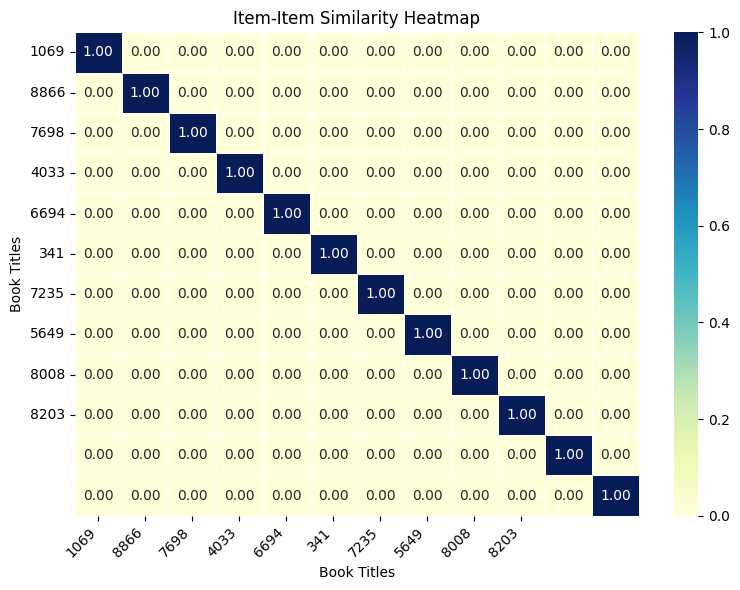

In [24]:
plot_item_similarity_heatmap(item_similarity.toarray(), data['Book.Title'], top_n=10)